# CSCE 5210 Fundamentals of AI Project - 2 (Genetic Algorithm)

## Submitted by:
Ashwini Sharma (<ashwinisharma@my.unt.edu>)


In [ ]:
import random as rd
import math
import numpy as np
from operator import itemgetter

### Question: R3

In [ ]:
##Example used in Project Document
num_jobs = 5
num_random_permut = 10
num_machines = 2
num_operations = 2

In [ ]:
max_allowed_permutations = math.factorial(num_jobs)

if max_allowed_permutations < num_random_permut:
    print("max possible permutations without duplicates are: " + str(math.factorial(num_jobs)) + " current value: " + str(num_random_permut))
    print("stopping execution, please correct the value of num_random_permut variable")
    exit()


init_list = list(range(1, (num_jobs+1)))

In [ ]:
#job timings
##in-class example
job_oper_time_list = {}
job_oper_time_list[1] = [3, 6]
job_oper_time_list[2] = [10, 1]
job_oper_time_list[3] = [3, 2]
job_oper_time_list[4] = [2, 4]
job_oper_time_list[5] = [8, 8]

In [ ]:
#Calculating Makespan
def calculate_fitness(input_population):
  initial_fitness = {}
  makespan_list = []
  machine_st_list = []
  for cnt in range(num_machines):
    machine_st_list.append(0)

  for chromo in range(len(input_population)):
    makespan_list = []
    machine_st_list = [0] * len(machine_st_list)
    chrosome_calc = input_population[chromo]
    for jobs in range(1, (num_jobs+num_operations)):
        i = 0
        job_time = []
        for operations in range(0, num_operations):
            if jobs - i <= 0:
                break
            elif jobs - i > num_jobs:
                i=i+1
                continue
            else:
                picked_job = chrosome_calc[jobs - i - 1]
                time_opr = job_oper_time_list[picked_job][i]
                inc_last = time_opr + machine_st_list[operations]
                job_time.append(inc_last)
                i = i + 1
                machine_st_list[operations] = time_opr + machine_st_list[operations]

        for mch in range(1, num_machines):
          machine_st_list[mch] = max(machine_st_list[0:mch+1])

        makespan_list.append(job_time)

    makespan_value = 0

    makespan_value = makespan_list[-1]

    initial_fitness[chromo] = makespan_value
  return initial_fitness


In [ ]:
def selection_chromosomes(fitness_dict, k):
  pick_chromosomes = dict(sorted(fitness_dict.items(), key = itemgetter(1))[:k])

  init_crossover_list = list(pick_chromosomes.keys())
  return pick_chromosomes, init_crossover_list

In [ ]:
def crossover_function(crossover_list, init_population, out_flag):
  init_crossover_list = crossover_list
  initial_population_list = init_population
  lp_cnt = 0
  children_list = []
  for chr in range(len(init_crossover_list)):
    for chr2 in range(chr+1, len(init_crossover_list)):
        parent_1 = initial_population_list[init_crossover_list[chr]]
        parent_2 = initial_population_list[init_crossover_list[chr2]]
        length_list = len(parent_1)
        upper_limit = math.ceil(length_list/3)
        cut_slice = rd.randint(1, upper_limit)
        child1 = []
        child2 = []

        for z in range(1, 3):
            if z == 1:
                lst1 = parent_1
                lst2 = parent_2

            else:
                lst1 = parent_2
                lst2 = parent_1

            #dividing each parent in 3 lists
            lst11 = lst1[:cut_slice]
            lst12 = lst1[cut_slice:(length_list-cut_slice)]
            lst13 = lst1[(length_list-cut_slice):]
            lst21 = lst2[:cut_slice]
            lst22 = lst2[cut_slice:(length_list-cut_slice)]
            lst23 = lst2[(length_list-cut_slice):]
            length_21_before = len(lst21)
            length_22_before = len(lst22)
            length_23_before = len(lst23)

            #parent 1’s cross-section is removed from parent 2
            for item in lst12:
              lst21.remove(item) if item in lst21 else None
              lst22.remove(item) if item in lst22 else None
              lst23.remove(item) if item in lst23 else None

            length_21_after = len(lst21)
            length_22_after = len(lst22)
            length_23_after = len(lst23)

            #moving all holes to center
            lst21.extend(lst22[:(length_21_before-length_21_after)])
            del lst22[:(length_21_before-length_21_after)]

            lst23[0:0] = lst22[:(length_23_before-length_23_after)]
            del lst22[:(length_23_before-length_23_after)]

            #Adding parent 1’s cross-section to holes (center list)
            lst22 = lst12

            #forming child with all 3 lists
            lst_child = [*lst21, *lst22, *lst23]

            #assigning children to 1 or 2
            if z == 1:
                child1 = lst_child
            else:
                child2 = lst_child
        lp_cnt = lp_cnt + 1

        if chr2 == 1 and out_flag ==1:
          print('\nDemo for crossover')
          print("Slice: " + str(cut_slice))
          print("Parent 1: " + str(parent_1))
          print("Parent 2: " + str(parent_2))
          print("Child 1: " + str(child1))
          print("Child 2: " + str(child2))


        children_list.append(child1)
        children_list.append(child2)

  return children_list


In [ ]:
#mutation:
def mutation_function(children_mutation_list):
  mutated_children_list = []
  for x in range(len(children_mutation_list)):
    child_list = children_mutation_list[x]
    pos_1 = rd.randint(0, len(child_list)-1)
    pos_2 = rd.randint(0, len(child_list)-1)
    child_list[pos_1], child_list[pos_2] = child_list[pos_2], child_list[pos_1]
    mutated_children_list.append(child_list)

  return mutated_children_list

In [ ]:
num_jobs = 5
num_random_permut = 10
num_machines = 2
num_operations = 2
generations = 100

initial_population = []
for p in range(num_random_permut):
    initial_population.append(list(np.random.permutation(init_list)))

print("initial population: " + str(initial_population))
print('\nlength of initial population: ' + str(len(initial_population)))
print('\njob operation times: ' + str(job_oper_time_list))

#calculating fitness of initial population:
init_fit = calculate_fitness(initial_population)
print('\ninitial fitness calculations: ' + str(init_fit))

#selection of 10 chromosomes:
k=10

cross_list_values, crossover_lst = selection_chromosomes(init_fit, k)
print('\ninitial crossover list with makespan: ' + str(cross_list_values))
print('\ninitial crossover list M(=10) Chromosomes (index number in population list): ' + str(crossover_lst))

#Crossover & Mutation:
children_population_cross = crossover_function(crossover_lst, initial_population, 1)

print('\nchildren population before mutation: ' + str(children_population_cross))

children_population = mutation_function(children_population_cross)

print('\ninitial children population (after mutation): ' + str(children_population))

initial_population.extend(children_population)


initial population: [[2, 3, 4, 1, 5], [3, 4, 2, 5, 1], [5, 3, 4, 1, 2], [3, 4, 2, 5, 1], [2, 1, 4, 3, 5], [5, 2, 1, 4, 3], [5, 2, 1, 3, 4], [4, 3, 5, 1, 2], [1, 3, 2, 4, 5], [1, 5, 4, 2, 3]]

length of initial population: 10

job operation times: {1: [3, 6], 2: [10, 1], 3: [3, 2], 4: [2, 4], 5: [8, 8]}

initial fitness calculations: {0: [34], 1: [37], 2: [29], 3: [37], 4: [34], 5: [33], 6: [33], 7: [28], 8: [34], 9: [28]}

initial crossover list with makespan: {7: [28], 9: [28], 2: [29], 5: [33], 6: [33], 0: [34], 4: [34], 8: [34], 1: [37], 3: [37]}

initial crossover list M(=10) Chromosomes (index number in population list): [7, 9, 2, 5, 6, 0, 4, 8, 1, 3]

Demo for crossover
Slice: 2
Parent 1: [4, 3, 5, 1, 2]
Parent 2: [1, 5, 4, 2, 3]
Child 1: [1, 4, 5, 2, 3]
Child 2: [3, 5, 4, 1, 2]

children population before mutation: [[1, 4, 5, 2, 3], [3, 5, 4, 1, 2], [4, 3, 5, 1, 2], [5, 3, 4, 1, 2], [2, 3, 5, 1, 4], [3, 2, 1, 4, 5], [2, 1, 5, 3, 4], [4, 3, 1, 5, 2], [2, 3, 5, 4, 1], [3, 5, 4, 1,

In [ ]:
for loop_generation in range(generations-1):
  ##print('\nGeneration: ' + str(loop_generation + 2))
  ##print("length of new population:" + str(len(initial_population)))
  #calculating fitness of new population:
  new_fit = calculate_fitness(initial_population)

  #selection of 10 chromosomes:
  k=10
  new_cross_values, new_crossover_lst = selection_chromosomes(new_fit, k)

  #Crossover & Mutation:
  new_children_population_cross = crossover_function(new_crossover_lst, initial_population, 0)

  new_children_population = mutation_function(new_children_population_cross)

  initial_population.extend(new_children_population)


#Final Run:

final_fit = calculate_fitness(initial_population)
#selection of 10 chromosomes:
k=10
final_cross_values, final_crossover_lst = selection_chromosomes(final_fit, k)

##print("Final run")
##print('\nFinal choromosome fitness values: ' + str(final_cross_values))


In [ ]:
max_job_key = max(final_fit, key = final_fit.get)
min_job_key = min(final_fit, key = final_fit.get)

print("min job key: " + str(min_job_key) + " value: " + str(final_fit[min_job_key]))
print("max job key: " + str(max_job_key) + " value: " + str(final_fit[max_job_key]))
print("Comparison between highest and worst fitness values: ")
print("Highest fitness values is: " + str(final_fit[min_job_key]) + " whereas the worst performance is: " + str(final_fit[max_job_key]))
print("Which is a significant gain of: " + str(round((final_fit[max_job_key][0] - final_fit[min_job_key][0])/final_fit[max_job_key][0],2)*100) + "% (over worst fitness)")

r3_min = final_fit[min_job_key][0]
r3_max = final_fit[max_job_key][0]

min job key: 32 value: [27]
max job key: 18 value: [39]
Comparison between highest and worst fitness values: 
Highest fitness values is: [27] whereas the worst performance is: [39]
Which is a significant gain of: 31.0% (over worst fitness)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

machine_st_list = []
for cnt in range(num_machines):
  machine_st_list.append(0)

tracker_list = []
chrosome_calc = initial_population[min_job_key]
for jobs in range(1, (num_jobs+num_operations)):
  i = 0
  for operations in range(0, num_operations):
    if jobs - i <= 0:
      break
    elif jobs - i > num_jobs:
      i=i+1
      continue
    else:
      picked_job = chrosome_calc[jobs - i - 1]
      time_opr = job_oper_time_list[picked_job][i]
      i = i + 1
      operation_num = "opr_" + str(operations+1)
      task_val = str(picked_job)+"_"+(str(operations+1))
      tracker_list.append([task_val, time_opr, machine_st_list[operations], operation_num])
      machine_st_list[operations] = time_opr + machine_st_list[operations]

  for mch in range(1, num_machines):
    machine_st_list[mch] = max(machine_st_list[0:mch+1])

end_time = max(machine_st_list)
df = pd.DataFrame(tracker_list, columns = ['task','days_start_to_end','start_num', 'operation_num'])

In [ ]:
machine_st_list = []
for cnt in range(num_machines):
  machine_st_list.append(0)

tracker_list = []
chrosome_calc = initial_population[max_job_key]
for jobs in range(1, (num_jobs+num_operations)):
  i = 0
  for operations in range(0, num_operations):
    if jobs - i <= 0:
      break
    elif jobs - i > num_jobs:
      i=i+1
      continue
    else:
      picked_job = chrosome_calc[jobs - i - 1]
      time_opr = job_oper_time_list[picked_job][i]
      i = i + 1
      operation_num = "opr_" + str(operations+1)
      task_val = str(picked_job)+"_"+(str(operations+1))
      tracker_list.append([task_val, time_opr, machine_st_list[operations], operation_num])
      machine_st_list[operations] = time_opr + machine_st_list[operations]

  for mch in range(1, num_machines):
    machine_st_list[mch] = max(machine_st_list[0:mch+1])

end_time = max(machine_st_list)
df_max = pd.DataFrame(tracker_list, columns = ['task','days_start_to_end','start_num', 'operation_num'])

In [ ]:
#reversing the order for plotting
df = df.rename_axis('MyIdx').sort_values(by = ['MyIdx'], ascending = [False])
df_max = df_max.rename_axis('MyIdx').sort_values(by = ['MyIdx'], ascending = [False])

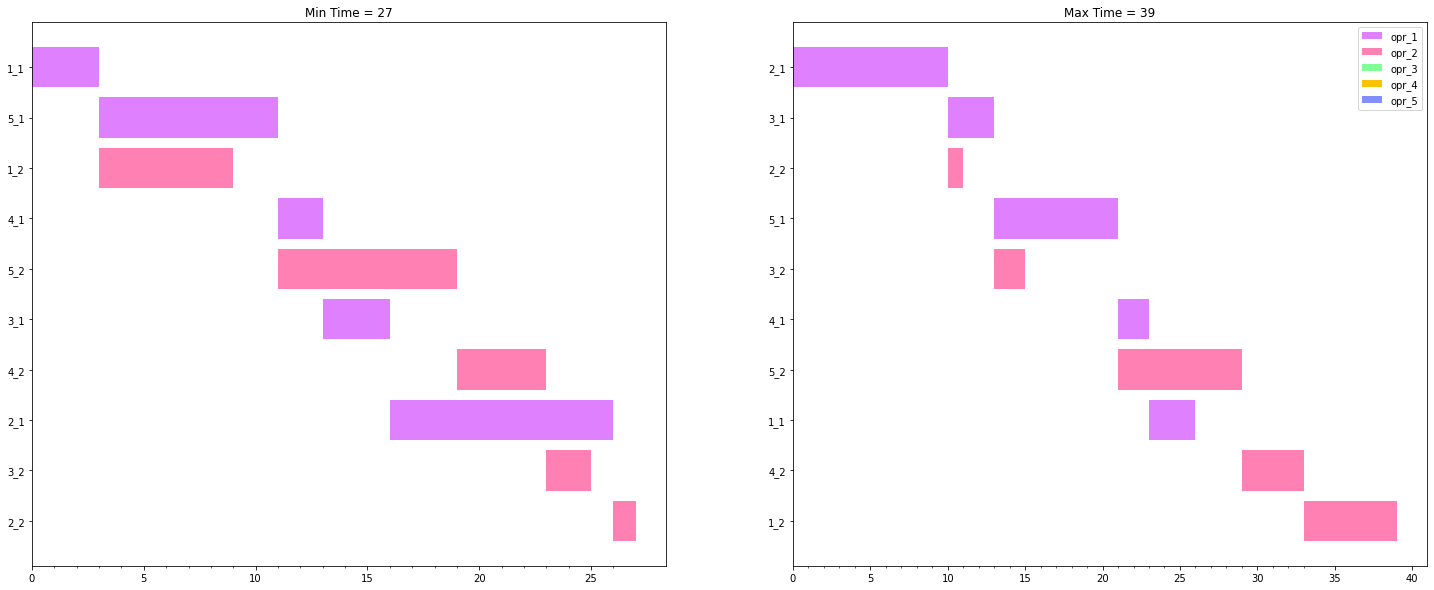

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# create a column with the color for each department
def color(row):
    c_dict = {'opr_1':'#DF80FF', 'opr_2':'#FF80B2', 'opr_3':'#80FF97', 'opr_4':'#FAC200', 'opr_5':'#808EFF'}
    return c_dict[row['operation_num']]
df['color'] = df.apply(color, axis=1)

df_max['color'] = df_max.apply(color, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

ax1.barh(df.task, df.days_start_to_end, left=df.start_num, color=df.color)

ax2.barh(df_max.task, df_max.days_start_to_end, left=df_max.start_num, color=df_max.color)

##### LEGENDS #####
c_dict = {'opr_1':'#DF80FF', 'opr_2':'#FF80B2', 'opr_3':'#80FF97', 'opr_4':'#FAC200', 'opr_5':'#808EFF'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)

##### TICKS #####
xticks_minor = np.arange(0, df.start_num.max()+1, 1)
xticks_minor_mx = np.arange(0, df_max.start_num.max()+1, 1)
ax1.set_xticks(xticks_minor, minor=True)
ax2.set_xticks(xticks_minor_mx, minor=True)

# grid lines
ax1.set_axisbelow(True)
ax1.xaxis.grid(color='w', linestyle='dashed', alpha=0.4, which='both')

ax2.set_axisbelow(True)
ax2.xaxis.grid(color='w', linestyle='dashed', alpha=0.4, which='both')

ax1.set_title("Min Time = " + str(df.start_num[df.index[0]] + df.days_start_to_end[df.index[0]]))
ax2.set_title("Max Time = " + str(df_max.start_num[df.index[0]] + df_max.days_start_to_end[df.index[0]]))
plt.show()

### Question: R4

In [ ]:
##variable declaration
num_jobs = 10
num_random_permut = 300
num_machines = 5
num_operations = 3
generations = 100

max_allowed_permutations = math.factorial(num_jobs)

if max_allowed_permutations < num_random_permut:
    print("max possible permutations without duplicates are: " + str(math.factorial(num_jobs)) + " current value: " + str(num_random_permut))
    print("stopping execution, please correct the value of num_random_permut variable")
    exit()


init_list = list(range(1, (num_jobs+1)))

#job timings
operation_time_min = 5
operation_time_max = 50

job_oper_time_list = {}

for j in range(1, (num_jobs+1)):
    job_time = []
    for oper in range(1, (num_operations+1)):
        job_time.append(rd.randint(operation_time_min, operation_time_max+1))

    job_oper_time_list[j] = job_time


initial_population = []
for p in range(num_random_permut):
    initial_population.append(list(np.random.permutation(init_list)))

print("initial population: " + str(initial_population))
print('\nlength of initial population: ' + str(len(initial_population)))
print('\njob operation times: ' + str(job_oper_time_list))

#calculating fitness of initial population:
init_fit = calculate_fitness(initial_population)
print('\ninitial fitness calculations: ' + str(init_fit))

#selection of 10 chromosomes:
k=10

cross_list_values, crossover_lst = selection_chromosomes(init_fit, k)
print('\ninitial crossover list with makespan: ' + str(cross_list_values))
print('\ninitial crossover list M(=10) Chromosomes (index number in population list): ' + str(crossover_lst))

#Crossover & Mutation:
children_population_cross = crossover_function(crossover_lst, initial_population, 1)

print('\nchildren population before mutation: ' + str(children_population_cross))

children_population = mutation_function(children_population_cross)

print('\ninitial children population (after mutation): ' + str(children_population))

initial_population.extend(children_population)

for loop_generation in range(generations-1):
  ##print('\nGeneration: ' + str(loop_generation + 2))
  #calculating fitness of new population:
  new_fit = calculate_fitness(initial_population)

  #selection of 10 chromosomes:
  k=10
  new_cross_values, new_crossover_lst = selection_chromosomes(new_fit, k)

  #Crossover & Mutation:
  new_children_population_cross = crossover_function(new_crossover_lst, initial_population, 0)

  new_children_population = mutation_function(new_children_population_cross)

  initial_population.extend(new_children_population)


#Final Run:

final_fit = calculate_fitness(initial_population)
#selection of 10 chromosomes:
k=10
final_cross_values, final_crossover_lst = selection_chromosomes(final_fit, k)

#print("Final run")
print('\nFinal choromosome fitness values: ' + str(final_cross_values))

max_job_key = max(final_fit, key = final_fit.get)
min_job_key = min(final_fit, key = final_fit.get)

print("min job key: " + str(min_job_key) + " value: " + str(final_fit[min_job_key]))
print("max job key: " + str(max_job_key) + " value: " + str(final_fit[max_job_key]))
print("Comparison between highest and worst fitness values: ")
print("Highest fitness values is: " + str(final_fit[min_job_key]) + " whereas the worst performance is: " + str(final_fit[max_job_key]))
print("Which is a significant gain of: " + str(round((final_fit[max_job_key][0] - final_fit[min_job_key][0])/final_fit[max_job_key][0],2)*100) + "% (over worst fitness)")
r4_min = final_fit[min_job_key][0]
r4_max = final_fit[max_job_key][0]


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

machine_st_list = []
for cnt in range(num_machines):
  machine_st_list.append(0)

tracker_list = []
chrosome_calc = initial_population[min_job_key]
for jobs in range(1, (num_jobs+num_operations)):
  i = 0
  for operations in range(0, num_operations):
    if jobs - i <= 0:
      break
    elif jobs - i > num_jobs:
      i=i+1
      continue
    else:
      picked_job = chrosome_calc[jobs - i - 1]
      time_opr = job_oper_time_list[picked_job][i]
      i = i + 1
      operation_num = "opr_" + str(operations+1)
      task_val = str(picked_job)+"_"+(str(operations+1))
      tracker_list.append([task_val, time_opr, machine_st_list[operations], operation_num])
      machine_st_list[operations] = time_opr + machine_st_list[operations]

  for mch in range(1, num_machines):
    machine_st_list[mch] = max(machine_st_list[0:mch+1])

end_time = max(machine_st_list)
df = pd.DataFrame(tracker_list, columns = ['task','days_start_to_end','start_num', 'operation_num'])


machine_st_list = []
for cnt in range(num_machines):
  machine_st_list.append(0)

tracker_list = []
chrosome_calc = initial_population[max_job_key]
for jobs in range(1, (num_jobs+num_operations)):
  i = 0
  for operations in range(0, num_operations):
    if jobs - i <= 0:
      break
    elif jobs - i > num_jobs:
      i=i+1
      continue
    else:
      picked_job = chrosome_calc[jobs - i - 1]
      time_opr = job_oper_time_list[picked_job][i]
      i = i + 1
      operation_num = "opr_" + str(operations+1)
      task_val = str(picked_job)+"_"+(str(operations+1))
      tracker_list.append([task_val, time_opr, machine_st_list[operations], operation_num])
      machine_st_list[operations] = time_opr + machine_st_list[operations]

  for mch in range(1, num_machines):
    machine_st_list[mch] = max(machine_st_list[0:mch+1])

end_time = max(machine_st_list)
df_max = pd.DataFrame(tracker_list, columns = ['task','days_start_to_end','start_num', 'operation_num'])

#reversing the order for plotting
df = df.rename_axis('MyIdx').sort_values(by = ['MyIdx'], ascending = [False])
df_max = df_max.rename_axis('MyIdx').sort_values(by = ['MyIdx'], ascending = [False])

initial population: [[6, 4, 10, 7, 1, 5, 9, 8, 3, 2], [8, 9, 5, 10, 7, 3, 1, 2, 4, 6], [2, 4, 1, 9, 5, 7, 6, 8, 3, 10], [1, 8, 6, 9, 10, 7, 5, 4, 2, 3], [10, 6, 2, 9, 5, 1, 3, 8, 4, 7], [2, 5, 1, 10, 9, 8, 3, 6, 7, 4], [9, 10, 4, 7, 3, 5, 1, 6, 8, 2], [5, 6, 10, 7, 8, 2, 3, 9, 4, 1], [2, 10, 3, 7, 1, 9, 8, 5, 6, 4], [8, 1, 3, 9, 5, 6, 4, 2, 10, 7], [9, 1, 7, 5, 10, 3, 6, 8, 4, 2], [2, 5, 9, 1, 6, 4, 7, 3, 10, 8], [7, 4, 3, 8, 5, 1, 2, 6, 9, 10], [1, 10, 5, 4, 8, 7, 3, 6, 9, 2], [1, 2, 10, 7, 3, 4, 9, 8, 5, 6], [3, 1, 4, 7, 2, 9, 6, 5, 10, 8], [5, 10, 3, 1, 2, 7, 8, 4, 6, 9], [2, 6, 8, 7, 4, 10, 5, 9, 3, 1], [3, 10, 5, 4, 6, 2, 7, 9, 1, 8], [1, 5, 2, 4, 8, 10, 3, 9, 6, 7], [5, 2, 7, 3, 4, 8, 6, 1, 10, 9], [3, 4, 7, 2, 8, 10, 1, 6, 9, 5], [6, 9, 1, 2, 3, 10, 8, 4, 5, 7], [7, 2, 3, 4, 10, 6, 1, 9, 8, 5], [3, 1, 4, 2, 8, 9, 6, 7, 10, 5], [10, 3, 8, 9, 2, 7, 4, 1, 5, 6], [5, 9, 1, 10, 4, 3, 2, 6, 7, 8], [5, 3, 8, 4, 1, 10, 9, 2, 6, 7], [5, 1, 9, 4, 8, 6, 7, 2, 10, 3], [1, 7, 8, 3, 9, 6, 5, 

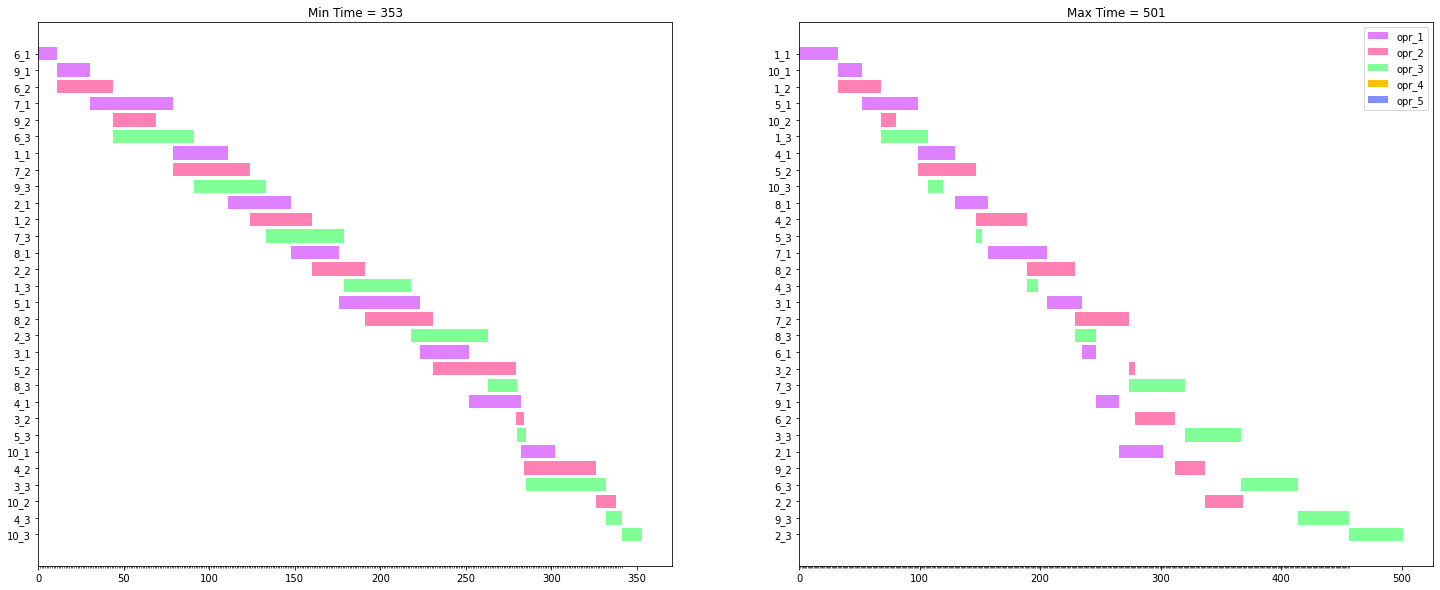

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# create a column with the color for each department
def color(row):
    c_dict = {'opr_1':'#DF80FF', 'opr_2':'#FF80B2', 'opr_3':'#80FF97', 'opr_4':'#FAC200', 'opr_5':'#808EFF'}
    return c_dict[row['operation_num']]
df['color'] = df.apply(color, axis=1)

df_max['color'] = df_max.apply(color, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

ax1.barh(df.task, df.days_start_to_end, left=df.start_num, color=df.color)

ax2.barh(df_max.task, df_max.days_start_to_end, left=df_max.start_num, color=df_max.color)

##### LEGENDS #####
c_dict = {'opr_1':'#DF80FF', 'opr_2':'#FF80B2', 'opr_3':'#80FF97', 'opr_4':'#FAC200', 'opr_5':'#808EFF'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)

##### TICKS #####
xticks_minor = np.arange(0, df.start_num.max()+1, 1)
xticks_minor_mx = np.arange(0, df_max.start_num.max()+1, 1)
ax1.set_xticks(xticks_minor, minor=True)
ax2.set_xticks(xticks_minor_mx, minor=True)

# grid lines
ax1.set_axisbelow(True)
ax1.xaxis.grid(color='w', linestyle='dashed', alpha=0.4, which='both')

ax2.set_axisbelow(True)
ax2.xaxis.grid(color='w', linestyle='dashed', alpha=0.4, which='both')

ax1.set_title("Min Time = " + str(df.start_num[df.index[0]] + df.days_start_to_end[df.index[0]]))
ax2.set_title("Max Time = " + str(df_max.start_num[df.index[0]] + df_max.days_start_to_end[df.index[0]]))
plt.show()

### Question: R5

In [ ]:
#Calculating Makespan
def calculate_fitness_less_mach(input_population):
  initial_fitness = {}
  makespan_list = []
  machine_st_list = []
  for cnt in range(num_machines):
    machine_st_list.append(0)

  for chromo in range(len(input_population)):
    makespan_list = []
    machine_st_list = [0] * len(machine_st_list)
    chrosome_calc = input_population[chromo]
    for jobs in range(1, (num_jobs+num_operations)):
        i = 0
        job_time = []
        lp = jobs%num_machines
        if jobs%num_machines == 0:
          lp = num_machines
        for operations in range(0, num_operations):
            if jobs - i <= 0:
                break
            elif jobs - i > num_jobs:
                i=i+1
                continue
            else:
              z = 0
              if num_operations>num_machines and jobs > num_machines and i == 0 and lp == 1:
                z = num_machines
                for x in range(num_operations):
                  for y in range(num_machines):
                    incr = num_machines - y - 1
                    picked_job = chrosome_calc[jobs - num_machines + incr - 1]
                    opr = num_machines + 1 + x - incr
                    if opr <= num_operations:
                      mch = opr%num_machines
                      if mch == 0:
                        mch = num_machines
                      time_opr = job_oper_time_list[picked_job][opr-1]
                      inc_last = time_opr + machine_st_list[mch-1]
                      job_time.append(inc_last)
                      machine_st_list[mch-1] = time_opr + machine_st_list[mch-1]


              picked_job = chrosome_calc[jobs - i - 1]
              time_opr = job_oper_time_list[picked_job][i]
              mch = (operations+1)%num_machines
              if mch == 0:
                mch = num_machines
              inc_last = time_opr + machine_st_list[mch-1]
              job_time.append(inc_last)
              i = i + 1 + z
              machine_st_list[mch-1] = time_opr + machine_st_list[mch-1]
              if (num_operations>num_machines and i>num_machines-1) or (num_operations>num_machines and i==lp):
                break

        for mch in range(1, num_machines):
          machine_st_list[mch] = max(machine_st_list[0:mch+1])

        makespan_list.append(job_time)

    makespan_value = 0
    makespan_value = makespan_list[-1]
    initial_fitness[chromo] = makespan_value
  return initial_fitness


In [ ]:
#Calculating Makespan
def calculate_single_fitness_df(input_job):
  r_r_machine_num = 0
  tracker_list = []
  chrosome_calc = input_job
  machine_st_list = []
  for cnt in range(num_machines):
    machine_st_list.append(0)

  for jobs in range(1, (num_jobs+num_operations)):
    i = 0
    lp = jobs%num_machines
    if jobs%num_machines == 0:
      lp = num_machines
    for operations in range(0, num_operations):
      if jobs - i <= 0:
        break
      elif jobs - i > num_jobs:
        i=i+1
        continue
      else:
        z = 0
        operation_num = ''
        if num_operations>num_machines and jobs > num_machines and i == 0 and lp == 1:
          z = num_machines
          for x in range(num_operations):
            for y in range(num_machines):
              incr = num_machines - y - 1
              picked_job = chrosome_calc[jobs - num_machines + incr - 1]
              opr = num_machines + 1 + x - incr
              operation_num = "opr_" + str(opr)
              task_val = str(picked_job)+"_"+(str(opr))
              if opr <= num_operations:
                mch = opr%num_machines
                if mch == 0:
                  mch = num_machines
                time_opr = job_oper_time_list[picked_job][opr-1]
                r_r_machine_num = mch
                ##print("[task_val, time_opr, machine_st_list[mch-1], operation_num]" + ", ", str(task_val) + ", " + str(time_opr) + ", " + str(machine_st_list[mch-1]) + ", " + str(operation_num))
                tracker_list.append([task_val, time_opr, machine_st_list[mch-1], operation_num])
                machine_st_list[mch-1] = time_opr + machine_st_list[mch-1]


        picked_job = chrosome_calc[jobs - i - 1]
        time_opr = job_oper_time_list[picked_job][i]
        operation_num = "opr_" + str(operations+1)
        task_val = str(picked_job)+"_"+(str(operations+1))
        r_r_machine_num = operations%num_machines
        mch = (operations+1)%num_machines
        if mch == 0:
          mch = num_machines
        inc_last = time_opr + machine_st_list[mch-1]
        i = i + 1 + z
        ##print("[task_val, time_opr, machine_st_list[mch-1], operation_num]" + ", " + str(task_val) + ", " + str(time_opr) + ", " + str(machine_st_list[mch-1]) + ", " + str(operation_num))
        tracker_list.append([task_val, time_opr, machine_st_list[r_r_machine_num], operation_num])
        machine_st_list[mch-1] = time_opr + machine_st_list[mch-1]
        if (num_operations>num_machines and i>num_machines-1) or (num_operations>num_machines and i==lp):
          break

    for mch in range(1, num_machines):
      machine_st_list[mch] = max(machine_st_list[0:mch+1])

  end_time = max(machine_st_list)
  df = pd.DataFrame(tracker_list, columns = ['task','days_start_to_end','start_num', 'operation_num'])
  return df


In [ ]:
##variable declaration
num_jobs = 10
num_random_permut = 300
num_machines = 3
num_operations = 5
generations = 100

max_allowed_permutations = math.factorial(num_jobs)

if max_allowed_permutations < num_random_permut:
    print("max possible permutations without duplicates are: " + str(math.factorial(num_jobs)) + " current value: " + str(num_random_permut))
    print("stopping execution, please correct the value of num_random_permut variable")
    exit()


init_list = list(range(1, (num_jobs+1)))

#job timings
operation_time_min = 5
operation_time_max = 50

job_oper_time_list = {}

for j in range(1, (num_jobs+1)):
    job_time = []
    for oper in range(1, (num_operations+1)):
        job_time.append(rd.randint(operation_time_min, operation_time_max+1))

    job_oper_time_list[j] = job_time

initial_population = []
for p in range(num_random_permut):
    initial_population.append(list(np.random.permutation(init_list)))

print("initial population: " + str(initial_population))
print('\nlength of initial population: ' + str(len(initial_population)))
print('\njob operation times: ' + str(job_oper_time_list))

#calculating fitness of initial population:
init_fit = calculate_fitness_less_mach(initial_population)
print('\ninitial fitness calculations: ' + str(init_fit))

#selection of 10 chromosomes:
k=10

cross_list_values, crossover_lst = selection_chromosomes(init_fit, k)
print('\ninitial crossover list with makespan: ' + str(cross_list_values))
print('\ninitial crossover list M(=10) Chromosomes (index number in population list): ' + str(crossover_lst))

#Crossover & Mutation:
children_population_cross = crossover_function(crossover_lst, initial_population, 1)

print('\nchildren population before mutation: ' + str(children_population_cross))

children_population = mutation_function(children_population_cross)

print('\ninitial children population (after mutation): ' + str(children_population))

initial_population.extend(children_population)

for loop_generation in range(generations-1):
  ##print('\nGeneration: ' + str(loop_generation + 2))
  ##print("length of new population:" + str(len(initial_population)))
  #calculating fitness of new population:
  new_fit = calculate_fitness_less_mach(initial_population)

  #selection of 10 chromosomes:
  k=10
  new_cross_values, new_crossover_lst = selection_chromosomes(new_fit, k)

  #Crossover & Mutation:
  new_children_population_cross = crossover_function(new_crossover_lst, initial_population, 0)

  new_children_population = mutation_function(new_children_population_cross)

  initial_population.extend(new_children_population)


#Final Run:

final_fit = calculate_fitness_less_mach(initial_population)
#selection of 10 chromosomes:
k=10
final_cross_values, final_crossover_lst = selection_chromosomes(final_fit, k)

##print("Final run")
##print('\nFinal choromosome fitness values: ' + str(final_cross_values))

max_job_key = max(final_fit, key = final_fit.get)
min_job_key = min(final_fit, key = final_fit.get)

print("min job key: " + str(min_job_key) + " value: " + str(final_fit[min_job_key]))
print("max job key: " + str(max_job_key) + " value: " + str(final_fit[max_job_key]))
print("Comparison between highest and worst fitness values: ")
print("Highest fitness values is: " + str(final_fit[min_job_key]) + " whereas the worst performance is: " + str(final_fit[max_job_key]))
print("Which is a significant gain of: " + str(round((final_fit[max_job_key][0] - final_fit[min_job_key][0])/final_fit[max_job_key][0],2)*100) + "% (over worst fitness)")

r5_min = final_fit[min_job_key][0]
r5_max = final_fit[max_job_key][0]


initial population: [[3, 9, 2, 5, 4, 8, 6, 10, 7, 1], [6, 2, 9, 8, 7, 3, 4, 10, 1, 5], [5, 2, 3, 9, 4, 8, 10, 6, 1, 7], [7, 3, 5, 4, 1, 6, 10, 9, 2, 8], [1, 5, 10, 9, 2, 3, 6, 7, 8, 4], [4, 1, 3, 8, 5, 6, 7, 10, 2, 9], [7, 9, 4, 6, 8, 10, 3, 2, 5, 1], [2, 10, 6, 9, 5, 1, 3, 8, 4, 7], [4, 2, 6, 9, 8, 3, 7, 5, 10, 1], [2, 6, 10, 7, 9, 3, 5, 8, 1, 4], [4, 1, 8, 9, 3, 7, 10, 5, 2, 6], [6, 2, 7, 5, 4, 8, 3, 10, 1, 9], [10, 9, 5, 2, 3, 4, 7, 8, 1, 6], [1, 6, 8, 5, 4, 7, 2, 3, 10, 9], [7, 10, 3, 6, 8, 2, 1, 4, 5, 9], [2, 10, 7, 4, 3, 6, 5, 9, 8, 1], [5, 9, 3, 2, 10, 4, 8, 6, 1, 7], [6, 4, 9, 1, 7, 2, 8, 3, 10, 5], [7, 9, 6, 1, 2, 3, 4, 10, 8, 5], [10, 6, 7, 4, 9, 2, 5, 1, 8, 3], [9, 10, 6, 4, 3, 2, 7, 1, 8, 5], [2, 8, 1, 6, 10, 4, 7, 5, 9, 3], [9, 5, 3, 4, 7, 2, 6, 10, 1, 8], [2, 1, 5, 6, 4, 3, 10, 9, 8, 7], [6, 8, 10, 5, 7, 4, 2, 3, 1, 9], [10, 9, 5, 1, 4, 3, 8, 6, 7, 2], [8, 7, 10, 4, 3, 5, 2, 1, 9, 6], [10, 5, 1, 8, 4, 2, 6, 9, 7, 3], [9, 6, 2, 1, 7, 4, 3, 5, 8, 10], [10, 8, 3, 5, 7, 9, 6,

In [ ]:
import pandas as pd

chrosome_calc = initial_population[min_job_key]
df = calculate_single_fitness_df(chrosome_calc)

chrosome_calc = initial_population[max_job_key]
df_max = calculate_single_fitness_df(chrosome_calc)

#reversing the order for plotting
df = df.rename_axis('MyIdx').sort_values(by = ['MyIdx'], ascending = [False])
df_max = df_max.rename_axis('MyIdx').sort_values(by = ['MyIdx'], ascending = [False])
##print(df)
##print(df_max)

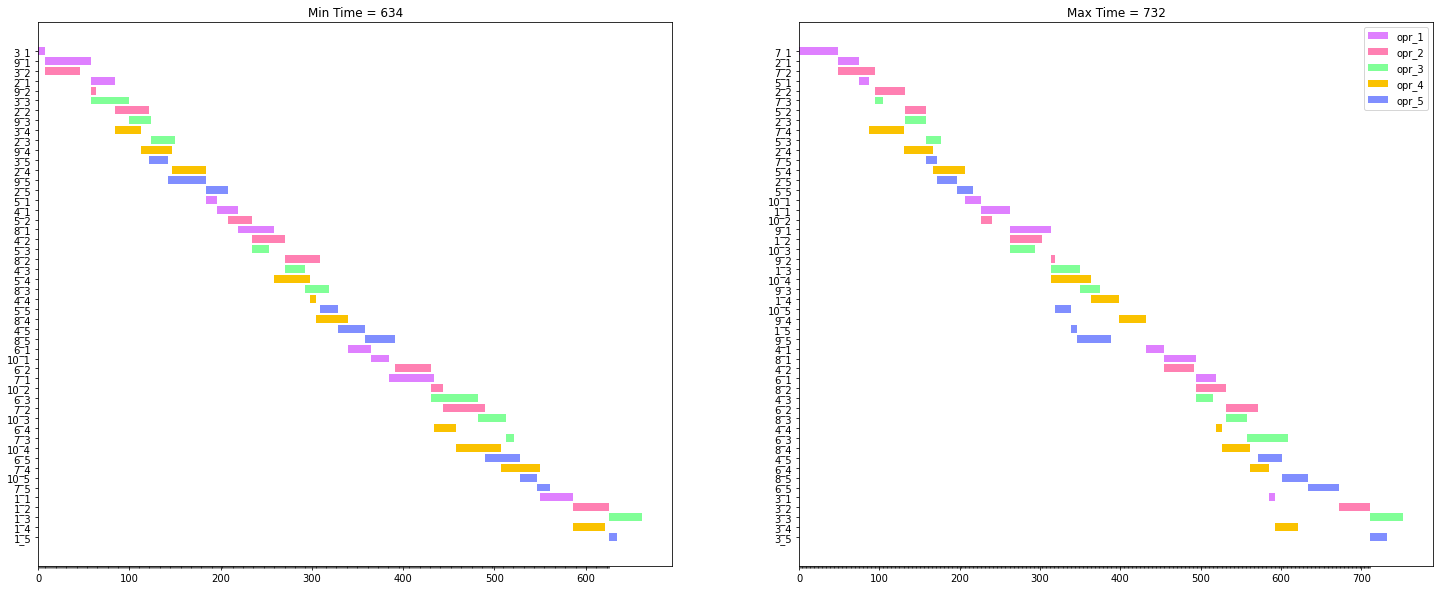

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# create a column with the color for each department
def color(row):
    c_dict = {'opr_1':'#DF80FF', 'opr_2':'#FF80B2', 'opr_3':'#80FF97', 'opr_4':'#FAC200', 'opr_5':'#808EFF'}
    return c_dict[row['operation_num']]

df['color'] = df.apply(color, axis=1)

df_max['color'] = df_max.apply(color, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

ax1.barh(df.task, df.days_start_to_end, left=df.start_num, color=df.color)

ax2.barh(df_max.task, df_max.days_start_to_end, left=df_max.start_num, color=df_max.color)

##### LEGENDS #####
c_dict = {'opr_1':'#DF80FF', 'opr_2':'#FF80B2', 'opr_3':'#80FF97', 'opr_4':'#FAC200', 'opr_5':'#808EFF'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)

##### TICKS #####
xticks_minor = np.arange(0, df.start_num.max()+1, 1)
xticks_minor_mx = np.arange(0, df_max.start_num.max()+1, 1)
ax1.set_xticks(xticks_minor, minor=True)
ax2.set_xticks(xticks_minor_mx, minor=True)

# grid lines
ax1.set_axisbelow(True)
ax1.xaxis.grid(color='w', linestyle='dashed', alpha=0.4, which='both')

ax2.set_axisbelow(True)
ax2.xaxis.grid(color='w', linestyle='dashed', alpha=0.4, which='both')

ax1.set_title("Min Time = " + str(df.start_num[df.index[0]] + df.days_start_to_end[df.index[0]]))
ax2.set_title("Max Time = " + str(df_max.start_num[df.index[0]] + df_max.days_start_to_end[df.index[0]]))
plt.show()

### Answers for R3, R4, R5

In [ ]:
print("Comparison between highest and worst fitness values for R3: ")
print("Highest fitness values is: " + str(r3_min) + " whereas the worst performance is: " + str(r3_max))
print("Which is a significant gain of: " + str(round((r3_max - r3_min)/r3_max,2)*100) + "% (over worst fitness)")


print('\nComparison between highest and worst fitness values for R4: ')
print("Highest fitness values is: " + str(r4_min) + " whereas the worst performance is: " + str(r4_max))
print("Which is a significant gain of: " + str(round((r4_max - r4_min)/r4_max,2)*100) + "% (over worst fitness)")


print('\nComparison between highest and worst fitness values for R5: ')
print("Highest fitness values is: " + str(r5_min) + " whereas the worst performance is: " + str(r5_max))
print("Which is a significant gain of: " + str(round((r5_max - r5_min)/r5_max,2)*100) + "% (over worst fitness)")


Comparison between highest and worst fitness values for R3: 
Highest fitness values is: 27 whereas the worst performance is: 39
Which is a significant gain of: 31.0% (over worst fitness)

Comparison between highest and worst fitness values for R4: 
Highest fitness values is: 353 whereas the worst performance is: 501
Which is a significant gain of: 30.0% (over worst fitness)

Comparison between highest and worst fitness values for R5: 
Highest fitness values is: 634 whereas the worst performance is: 732
Which is a significant gain of: 13.0% (over worst fitness)


### Question: R6

R6: Reflect in at most 3 paragraphs the level of success that your GA achieved in this project.

In this project, we have worked upon 3 different scenarios:


*   Scenario 1: 5 jobs, 2 operations & 2 machines (permutations: 10)
*   Scenario 2: 10 jobs, 3 operations & 5 machines (permutations: 300)
*   Scenario 3: 10 jobs, 5 operations & 3 machines (permutations: 300)

In scenario 1, where #operations and # machines were equal, the highested fitness value is 27 and max value is 39, which is around 30% gain. In scenario 2, where #machines are more than #operations due to which not all machines were occupied. The gain we got using GA was significant. Each generation reflected the gain and withing few (10-20) generation optimization was achieved.

Scenario 3 had more operations than machines, because of which the completion time was more as jobs took time to complete. Used round robin to allocate machines to jobs and some jobs had to wait for long as machines were occupied. Still GA optimized the fitness value i.e. makespan with a good margin from initial population. In all the scenarios, GA optimized the fitness value with each generation hence it's really useful for optimization problems.


